In [1]:
import spyx
import spyx.nn as snn

import jax
import jax.numpy as jnp
import numpy as np

import nir

import matplotlib.pyplot as plt

In [6]:
input_data = jnp.transpose(jnp.array(np.load("val_numbers.npy"), dtype=jnp.float32), axes=(1,0,2,3,4))

In [7]:
input_data.shape # had to transpose data because it's stored in time-major format...

(10, 300, 2, 34, 34)

In [8]:
ng = nir.read("scnn_mnist.nir")

In [9]:
SNN, params = spyx.nir.from_nir(ng, input_data, dt=1, return_all_states=True)

In [10]:
params.keys()

dict_keys(['conv2_d', 'conv2_d_1', 'conv2_d_2', 'linear', 'linear_1'])

In [11]:
a, b = SNN.apply(params, input_data)

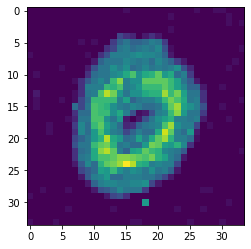

In [17]:
plt.imshow(jnp.sum(input_data[0], axis=(0,1)))

In [33]:
jnp.sum(a[0], axis=0)

Array([236.,   0.,  21.,   1.,   0.,   5.,   0.,   0.,   0.,   1.],      dtype=float32)

In [27]:
b[0].shape

(10, 300, 16, 16, 16)

In [28]:
test = jnp.reshape(b[0], (300,-1))

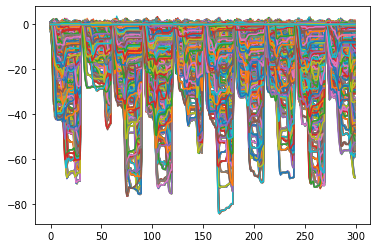

In [29]:
plt.plot(test)
plt.show()